2/2 [==============================] - 0s 6ms/step
Epoch0, Discriminator Loss:0.9287035763263702, Generator Loss:1.4926915168762207
1/1 [==============================] - 0s 62ms/step


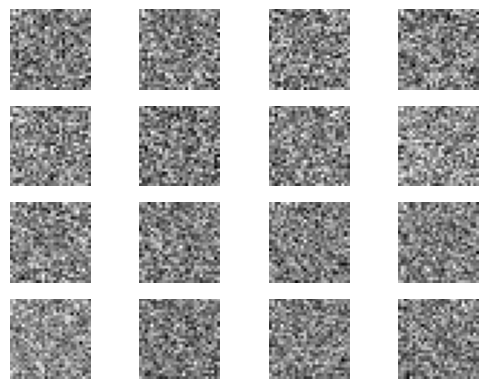

2/2 [==============================] - 0s 5ms/step
Epoch100, Discriminator Loss:0.18373383954167366, Generator Loss:2.7592291831970215
1/1 [==============================] - 0s 20ms/step


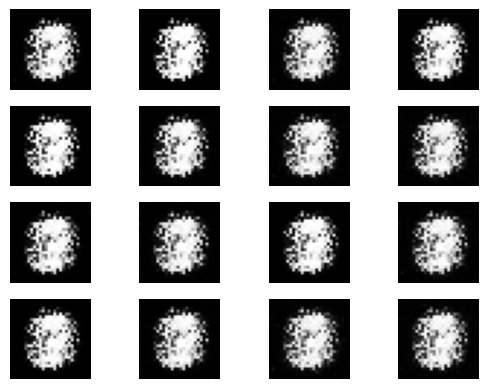

2/2 [==============================] - 0s 6ms/step
Epoch200, Discriminator Loss:0.04078071936964989, Generator Loss:4.710124969482422
1/1 [==============================] - 0s 21ms/step


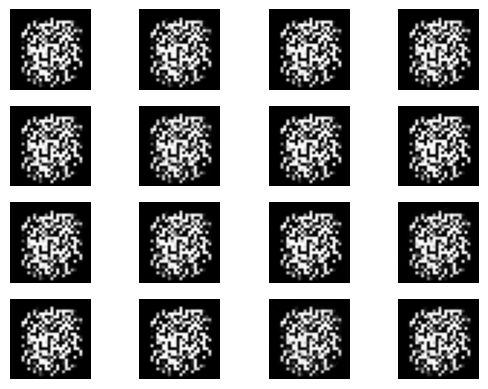

2/2 [==============================] - 0s 5ms/step
Epoch300, Discriminator Loss:0.03923250362277031, Generator Loss:5.606922149658203
1/1 [==============================] - 0s 21ms/step


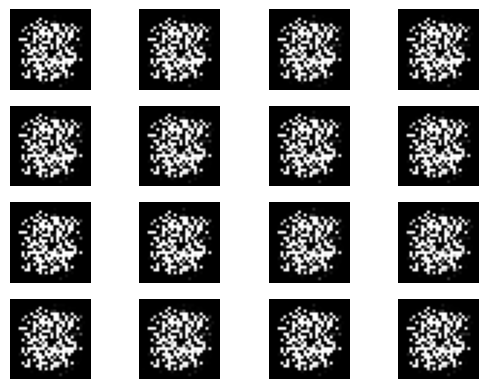

2/2 [==============================] - 0s 5ms/step


In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

#define generator model
def build_generator(latent_dim):
  model=tf.keras.Sequential()# object creation
  model.add(layers.Dense(128,input_dim= latent_dim, activation='relu'))
  model.add(layers.Dense(784,activation='sigmoid'))#probability value
  model.add(layers.Reshape((28,28,1)))
  return model

#define generator model
def build_discriminator(img_shape):
  model=tf.keras.Sequential()# object creation
  model.add(layers.Flatten(input_shape=img_shape))
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  return model

#define the gan model by combining the generator and discriminator
def build_gan(generator,discriminator):
    discriminator.trainable= False# set the discriminator not to be trainable during GAN traning.

    model=tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

#load MNIST dataset
(x_train,_), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train/ 255.0  #normalization pixel values bw o-1

# reshape images
x_train=x_train.reshape((x_train.shape[0],28,28,1))

#build and compile the discriminator
discriminator= build_discriminator((28,28,1))
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#build and compile the generator
latent_dim=100
generator = build_generator(latent_dim)

#build and compile the GAn model
discriminator.trainable = False
gan=build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

#training the GAN
epochs= 10000
batch_size=64

for epoch in range(epochs):
  #generate random noise as input to the generator
  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))

  #generate fake images using thre generator
  generated_images = generator.predict(noise)

  #select a random batch of real image
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  real_images = x_train[idx]

  #create labels for the generated and real image
  labels_real = np.ones((batch_size, 1))
  labels_fake = np.zeros((batch_size, 1))


  #train the discriminator on real and fake images
  d_loss_real = discriminator.train_on_batch(real_images, labels_real)
  d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)

  #calculate the total discriminator loss
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  #train the generator by fooling the discriminator
  noise= np.random.normal(0, 1, size=(batch_size, latent_dim))
  labels_gan = np.ones((batch_size,1))
  g_loss = gan.train_on_batch(noise, labels_gan)

  #prnt progress and save generated images at certain intrvals
  if epoch % 100 ==0:
    print(f"Epoch{epoch}, Discriminator Loss:{d_loss[0]}, Generator Loss:{g_loss}")
    #save generated images
    gen_imgs=generator.predict(np.random.normal(0,1,size=(16, latent_dim)))
    gen_imgs =0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(4,4)
    count = 0
    for i in range(4):
      for j in range(4):
        axs[i,j].imshow(gen_imgs[count,:, :,0], cmap='gray')
        axs[i,j].axis('off')
        count += 1
    plt.show()



